## Solutions to  Exercises Laplace Transform 2
---

- [Exercise 1](#Exercise-1)
- [Solution 1](#Solution-1)
- [Exercise 2](#Exercise-2)
- [Solution 2](#Solution-2)
- [Exercise 3](#Exercise-3)
- [Solution 3](#Solution-3)

In [22]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import control as c
import warnings
warnings.filterwarnings("ignore")

### Exercise 1
---
Consider an LTI system with the following pole-zero plot (note the twofold pole!). The gain for this system is $K=2$.

<img src="pzm.png" height="100" width="350"/>


> (a) From the pole-zero plot write down the transfer function $H(s)$ and the Frequency response $H(i\omega)$.

>(b) Give the asympotes for $\omega \rightarrow 0$ and $\omega \rightarrow \infty$.

>(c) Sketch $|H(i\omega)|$.

>(d) Plot $|H(i\omega)|$ and $\phi(\omega)$ using Python.

>(e) Simulate the systems output due to the inputs
$$
(a)\,x(t) = \begin{cases} t & t \in [0,2] \\ 0 & t>2\end{cases}\qquad\quad
(b)\, x(t) = \sin(2\pi f t)\quad \mathrm{with}\quad f=0.1
$$

### Solution 1
---
>(a) We have
$$
H(s) = 2\frac{1}{(s+2)^2} = \frac{2}{s^2+4s+4}
$$
>and
$$
H(i\omega) =  \frac{2}{-\omega^2+4i\omega+4}
$$

>(b) The asymptotes are given by
$$
H(i\omega) \approx \frac{2}{4} = \frac{1}{2}
$$
>for small $\omega$ and
$$
H(i\omega) \approx -\frac{2}{\omega^2}
$$
>for large $\omega$

>(d) We obtain 

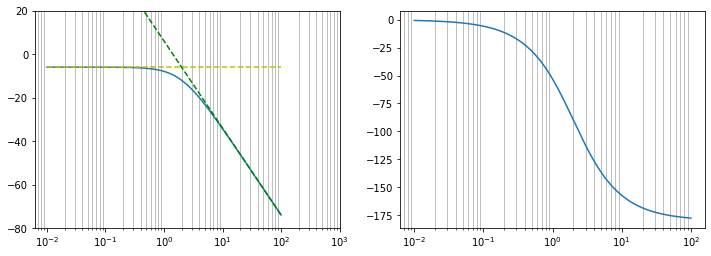

In [9]:
plt.figure(figsize=(12,4))
# Bode Magnitude Plot
plt.subplot(1,2,1)
sys = signal.TransferFunction([2],[1,4,4])
w,H,phi = sys.bode(w=np.logspace(-2,2,1000))
plt.plot(w,H)
# Plot asymptotes
plt.plot(w,0*w+20*np.log10(1/2),'y--')
plt.plot(w,20*np.log10(2/w**2),'g--')
plt.xscale('log')
plt.grid(True, which='both')
plt.axis([-2,1000,-80,20])
plt.grid()

# Bode Phase Plot
plt.subplot(1,2,2)
plt.plot(w,phi)
plt.xscale('log')
plt.grid(True,which='both')
plt.grid()

In [16]:
20*np.log10(1/2)

-6.020599913279624

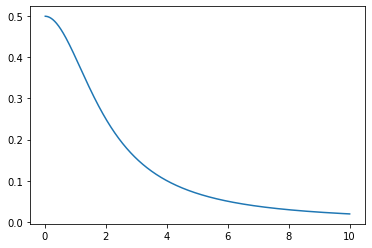

In [10]:
w1,H1 = sys.freqresp(w=np.linspace(0.01,10,1000))
plt.plot(w1,np.abs(H1))
#plt.plot(w1,np.rad2deg(np.angle(H1)))
#plt.xscale('log')


> (e) We obtain

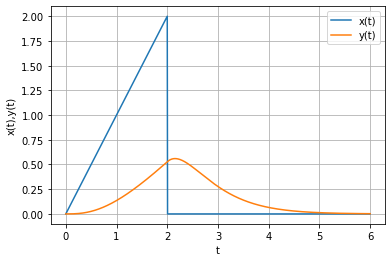

In [16]:
t = np.linspace(0,6,1000)
x = t.copy()
x[t>2] = 0
plt.plot(t,x,label='x(t)')

t,y,x = signal.lsim(sys,x,t)
plt.plot(t,y,label='y(t)')
plt.legend()
plt.xlabel('t')
plt.ylabel('x(t),y(t)')
plt.grid()
plt.show()

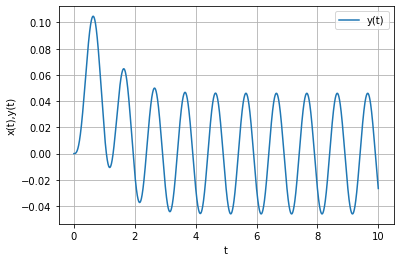

In [18]:
f = 1
w = 2*np.pi*f
t = np.linspace(0,2*np.pi/w*10,10000)
x = np.sin(2*np.pi*f*t)
#plt.plot(t,x,label='x(t)')
t,y,x = signal.lsim(sys,x,t)
plt.plot(t,y,label='y(t)')
plt.grid()
plt.xlabel('t')
plt.ylabel('x(t),y(t)')
plt.legend()
plt.show()

### Exercise 2

Consider the following two LTI systems with the transfer functions
$$
(a)\, H(s) = \frac{s}{s+1}\qquad
(b)\, H(s) = \frac{s}{s-1}
$$
(a) Write down the corresponing equations in time domain.

(b) Sketch the frequency response by hand and using `scipy.signal`.

(c) Simulate the impulse respone for both systems.

(d) Simulate the step respone for both systems.

### Solution 2
(a) We obtain
$$
(a)\, \dot{y}(t)+y(t) = \dot{x}(t),\qquad \qquad 
(b)\, \dot{y}(t)-y(t) = \dot{x}(t)
$$
(b) - (d): See Python Code below

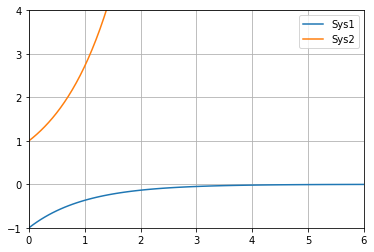

In [26]:
sys1 = signal.TransferFunction([1,0],[1,1])
sys2 = signal.TransferFunction([1,0],[1,-1])
t1,h1 = sys1.impulse()
t2,h2 = sys2.impulse()

plt.plot(t1,h1,label='Sys1')
plt.plot(t2,h2,label='Sys2')
plt.axis([0,6,-1,4])
#plt.plot(t1,-np.exp(-t1),'y--')
#plt.plot(t1,np.exp(t1),'y--')
plt.grid()
plt.legend()
plt.show()

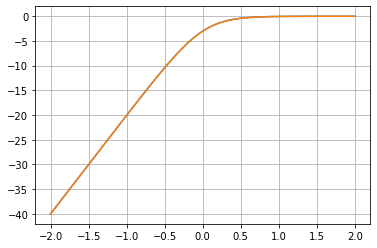

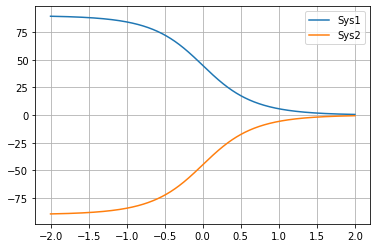

In [20]:
w1, H1, phi1 = sys1.bode(w=np.logspace(-2,2,1000))
w2, H2, phi2 = sys2.bode(w=np.logspace(-2,2,1000))

plt.plot(np.log10(w1),H1)
plt.plot(np.log10(w2),H2)
plt.grid()
plt.show()

plt.plot(np.log10(w1),phi1,label='Sys1')
plt.plot(np.log10(w2),phi2,label='Sys2')
plt.grid()
plt.legend()
plt.show()

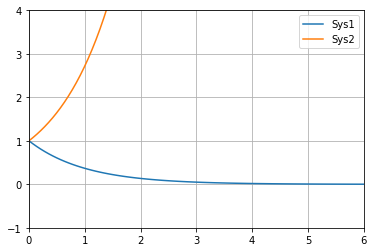

In [69]:
t1,step1 = sys1.step()
t2,step2 = sys2.step()

plt.plot(t1,step1,label='Sys1')
plt.plot(t2,step2,label='Sys2')
plt.axis([0,6,-1,4])

plt.grid()
plt.legend()
plt.show()

### Exercise 3
---

> (a) Construct a so called Butterworth low-pass filter (https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html#scipy.signal.butter) with a cutoff frequency $\omega_c =1$. 
$$
|H(i\omega)|^2 = \frac{1}{1+\left(\frac{i\omega}{i\omega_c}\right)^{2n}} = \frac{1}{1+\frac{\omega^{2n}}{\omega_c^{2n}}}
$$
Plot the corresonding phase and magnitude plot für the filter order (i.e. the number of poles) $n = 2,\ldots,8$.

> (b) For $n=3$ generate the pole-zero plot. 

> (c) Simulate (using `signal.lsim()`) the output $y(t)$ for the given input $x(t)$.

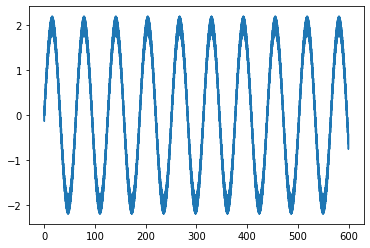

In [38]:
t = np.linspace(0,600,40*10**3)
x = 2*np.sin(0.1*t)+ 0.2*np.cos(10*t)
plt.plot(t,x)

### Solution 3
---
> (a) We obtain

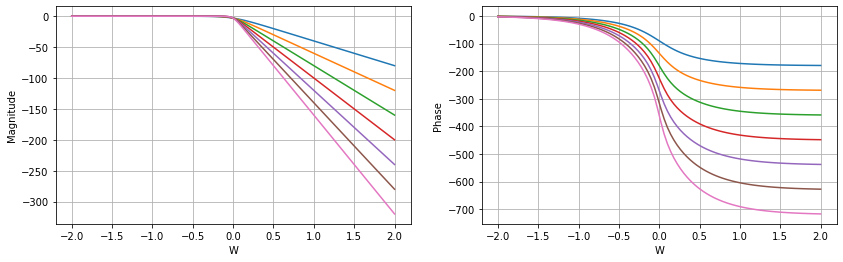

In [20]:
plt.figure(figsize=(14,4))
for k in range(2,9):
    a,b = signal.butter(k,Wn=1,output='ba',analog=True)
    sys = signal.TransferFunction(a,b)
    w, mag,phi = sys.bode(w=np.logspace(-2,2,100))
    # Bode magnitude plot
    plt.subplot(1,2,1)
    plt.plot(np.log10(w),mag)
    plt.xlabel('W')
    plt.ylabel('Magnitude')
    plt.grid()
    # Bode phase plot  
    plt.subplot(1,2,2)
    plt.plot(np.log10(w),phi)
    plt.xlabel('W')
    plt.ylabel('Phase')
    plt.grid()

In [21]:
sys.to_zpk()

ZerosPolesGainContinuous(
array([], dtype=float64),
array([-0.19509032+0.98078528j, -0.19509032-0.98078528j,
       -0.55557023+0.83146961j, -0.55557023-0.83146961j,
       -0.83146961+0.55557023j, -0.83146961-0.55557023j,
       -0.98078528+0.19509032j, -0.98078528-0.19509032j]),
1.0,
dt: None
)

For comparison we find the magnitude plot for a system with transfer function
$$
H(s) = \frac{1}{(s+\omega_c)^n}
$$
which has an $n$-fold pole at $s=-\omega_c$. As you see in the figure below the asysmptots for $\omega \ll  \omega_c$ and $\omega \gg \omega_c$ are equal. In the crossover region, however, i.e. $\omega \approx \omega_c$, the Butterworth low-pass filter outperforms (as it remains much longer close to 1).

[-2, 0.5, -60, 5]

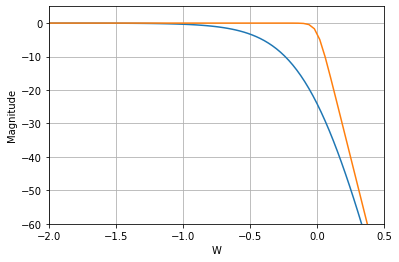

In [35]:
sys2 = signal.ZerosPolesGain([],[-1 for k in range(8)],1)
w2, mag2,phi2 = sys2.bode()
plt.plot(np.log10(w2),mag2)
plt.plot(np.log10(w),mag)
plt.xlabel('W')
plt.ylabel('Magnitude')
plt.grid()
plt.axis([-2,0.5,-60,5])

> (b) We obtain

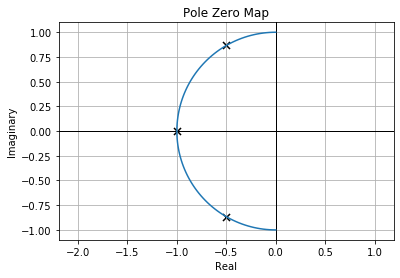

In [48]:
n = 3
a,b = signal.butter(n,Wn=1,output='ba',analog=True)
sys = c.tf(a,b)
c.pzmap(sys)
plt.grid()
plt.plot(1*np.sin(np.linspace(-np.pi,0,100)),1*np.cos(np.linspace(0,np.pi,100)))

In [16]:
signal.TransferFunction(a,b).to_zpk()

ZerosPolesGainContinuous(
array([], dtype=float64),
array([-1. +0.j       , -0.5+0.8660254j, -0.5-0.8660254j]),
1.0,
dt: None
)

> (c) We obtain

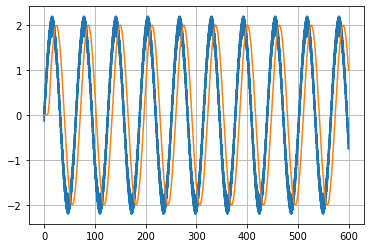

In [46]:
t = np.linspace(0,600,40*10**3)
x = 2*np.sin(0.1*t)+ 0.2*np.cos(10*t)

a,b = signal.butter(13,Wn=1,output='ba',analog=True)
sys = signal.TransferFunction(a,b)
plt.plot(t,x)

t,y,x = signal.lsim(sys,x,t)
plt.plot(t,y)
plt.grid()

In [20]:
sys = signal.TransferFunction([1,0],[1,1])
sys

TransferFunctionContinuous(
array([1., 0.]),
array([1., 1.]),
dt: None
)

In [21]:
sys.to_zpk()

ZerosPolesGainContinuous(
array([0.]),
array([-1.]),
1.0,
dt: None
)